In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def read_excel(path):
    return pd.read_excel(path)

In [3]:
path_1 = '../Data/Preprocessing/Data Losarang/2022/3_lhrt_losarang_2022.xlsx'

df = read_excel(path_1)
df.head()

,HARI,JAM,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP
0,Friday,00:00,37,61,46,7,61,114,183
1,Friday,01:00,29,58,41,6,58,102,166
2,Friday,02:00,26,56,38,5,56,95,156
3,Friday,03:00,24,52,35,5,52,88,144
4,Friday,04:00,23,51,34,5,51,85,140


In [4]:
def normalisasi(df, HARI):
    data = df[df['HARI'] == HARI].copy() 
    data.loc[:, 'SMP_zscore'] = (data['SMP'] - data['SMP'].min()) / (data['SMP'].max() - data['SMP'].min())
    return data
    

In [5]:
day_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_names

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [6]:
# List untuk menampung hasil normalisasi
df_list = []

# Iterasi untuk setiap hari dan normalisasi data
for day in day_names:
    df_normalized = normalisasi(df, day)
    df_list.append(df_normalized)

# Menggabungkan kembali hasilnya menjadi satu DataFrame
df_result = pd.concat(df_list)

In [7]:
df = df_result.copy()
df.to_excel('../Data/Preprocessing/Data Losarang/2022/4_lhrt_normalisasi_losarang_2022.xlsx', index=False)
df.head(48)

,HARI,JAM,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP,SMP_zscore
24,Monday,00:00,39,40,19,8,40,48,95,0.092784
25,Monday,01:00,34,37,18,7,37,44,88,0.068729
26,Monday,02:00,29,33,16,6,33,41,79,0.037801
27,Monday,03:00,23,30,15,5,30,38,72,0.013746
28,Monday,04:00,23,28,14,5,28,35,68,0.000000
29,Monday,05:00,52,34,19,10,34,47,91,0.079038
30,Monday,06:00,173,57,47,35,57,118,210,0.487973
31,Monday,07:00,229,68,46,46,68,116,230,0.556701
32,Monday,08:00,185,69,45,37,69,112,218,0.515464
33,Monday,09:00,189,71,46,38,71,114,222,0.529210


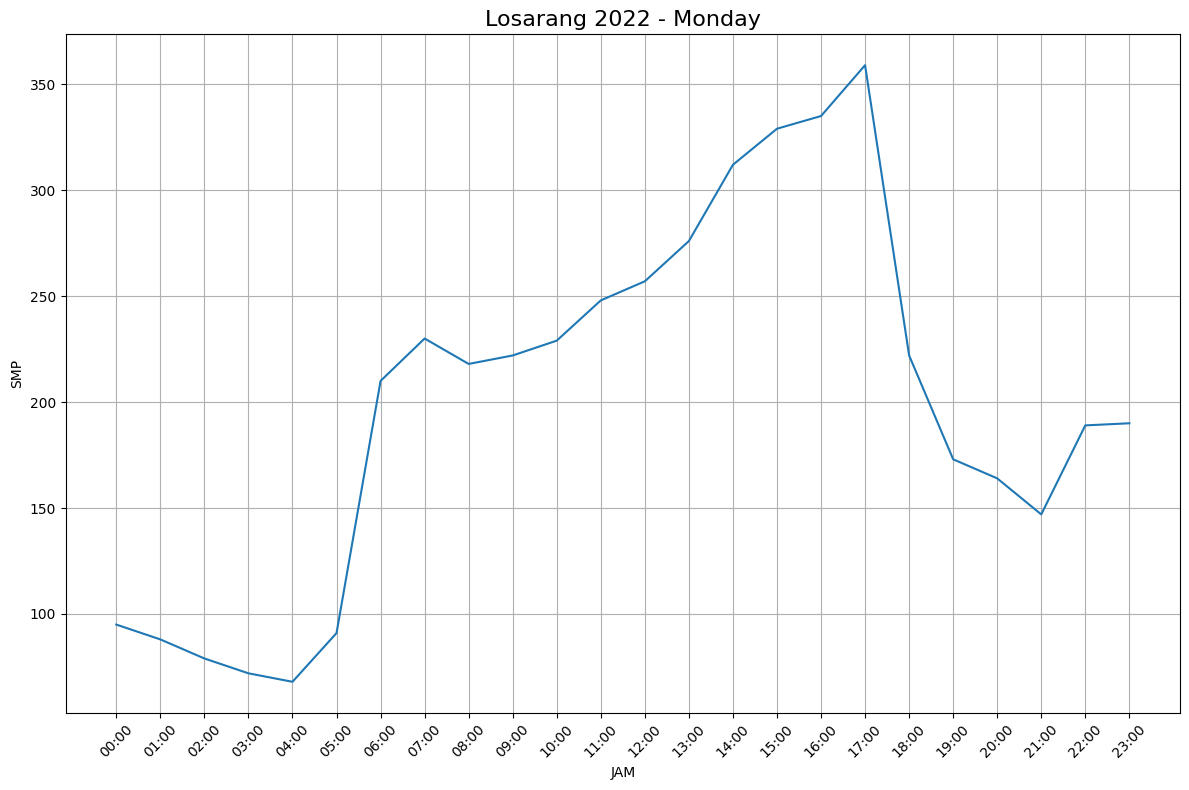

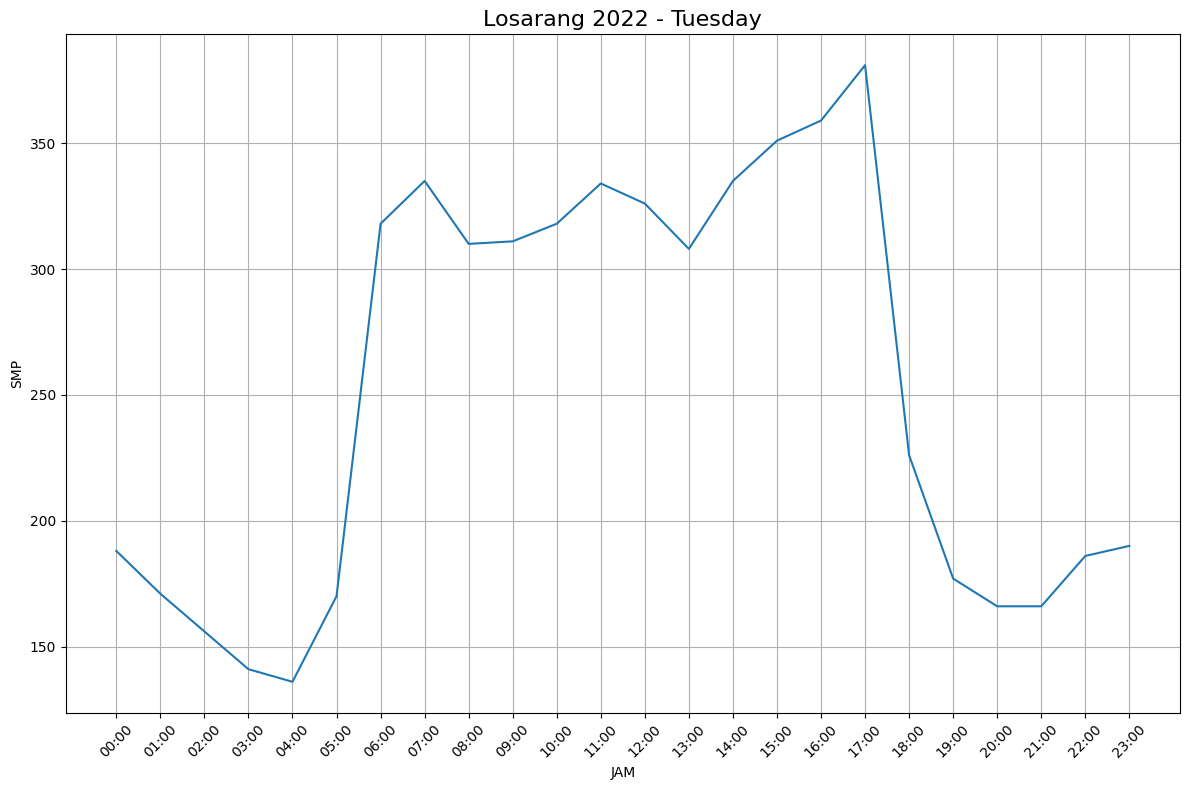

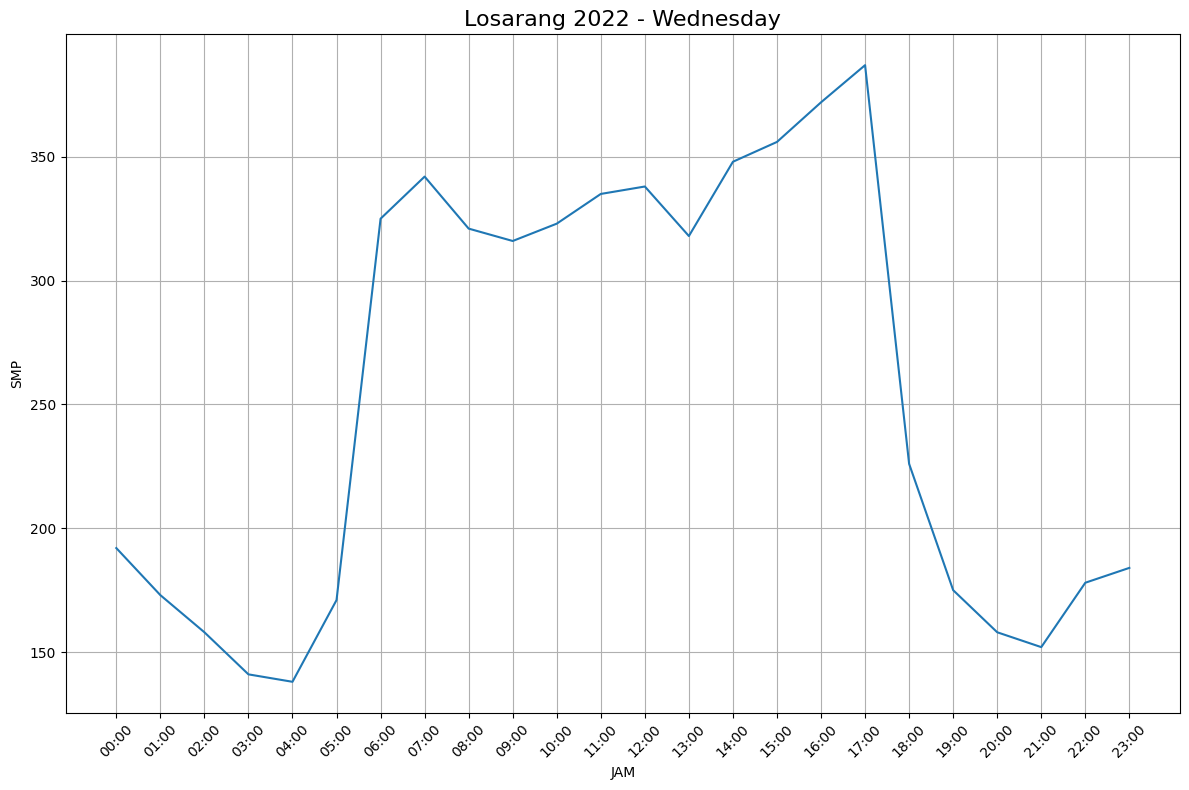

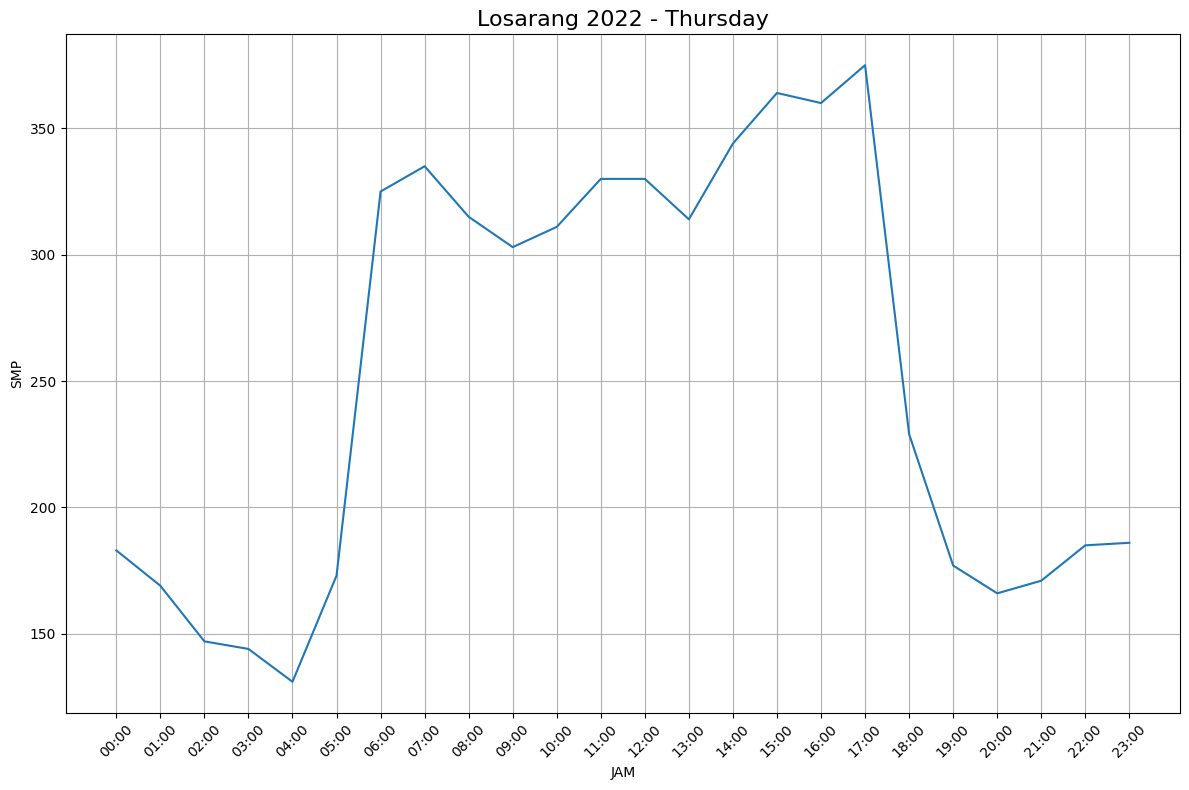

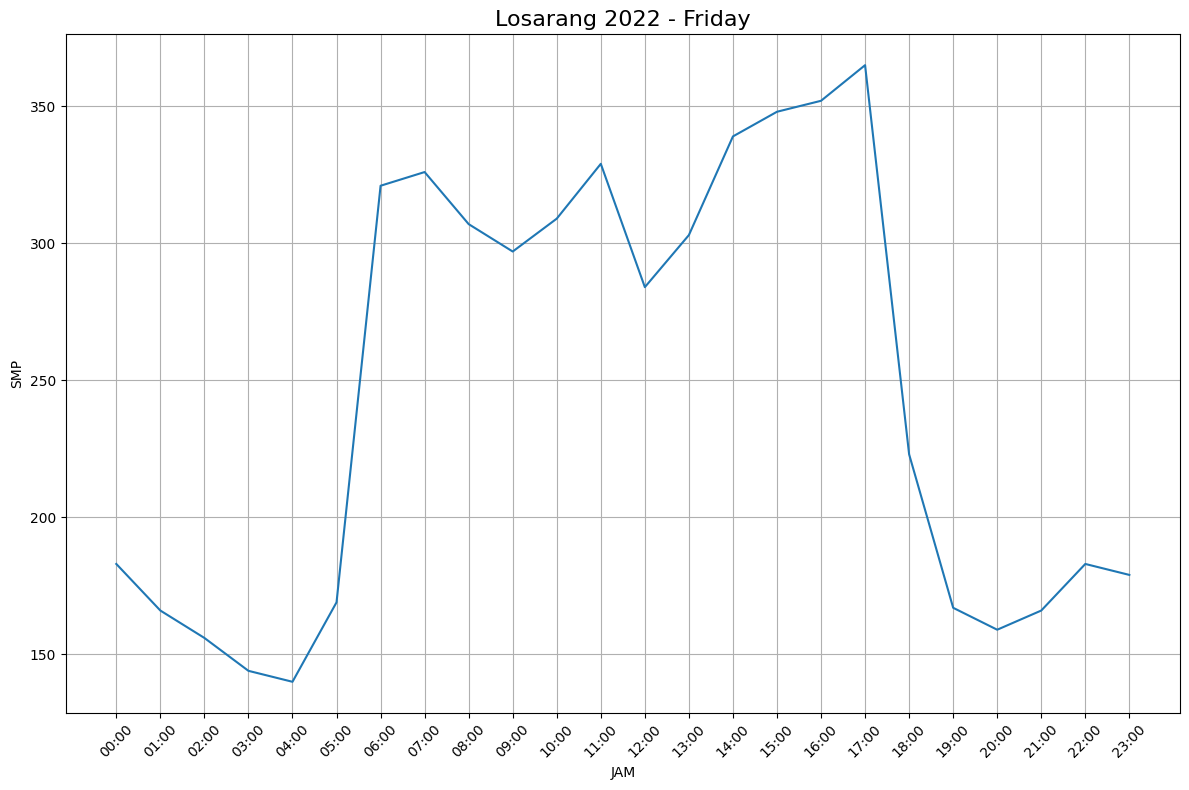

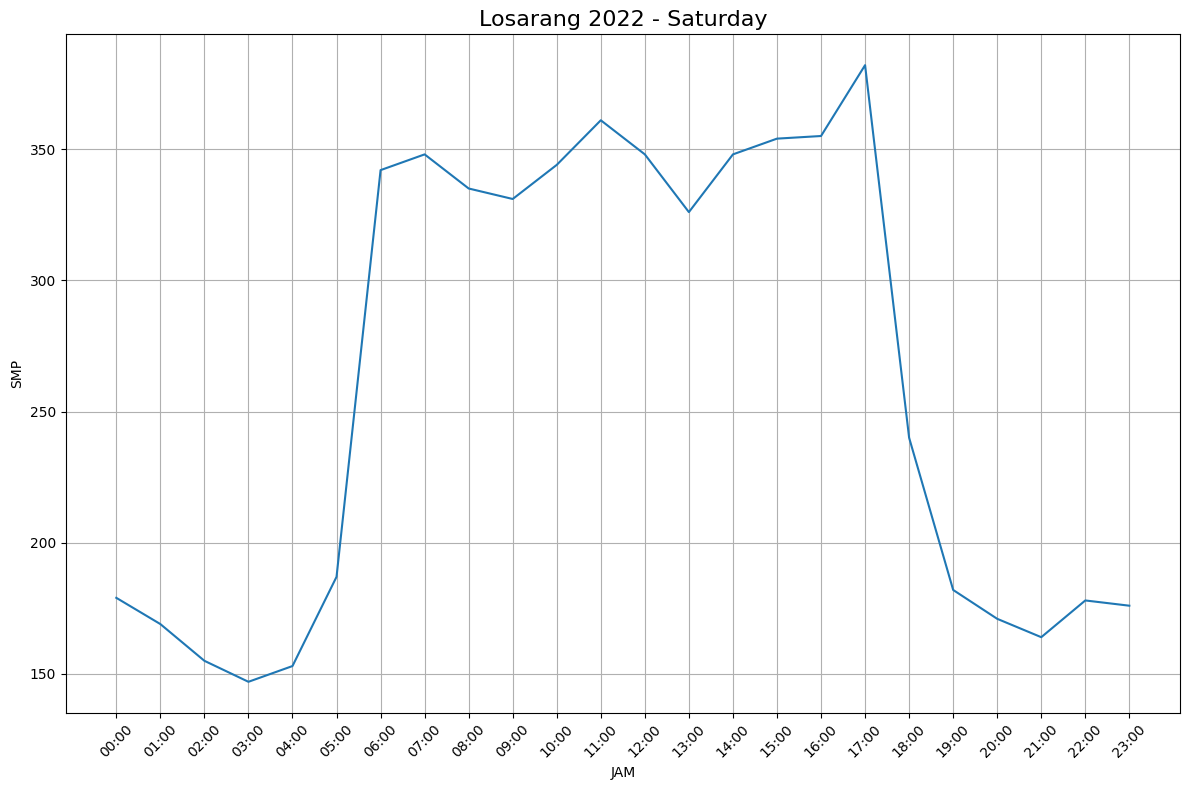

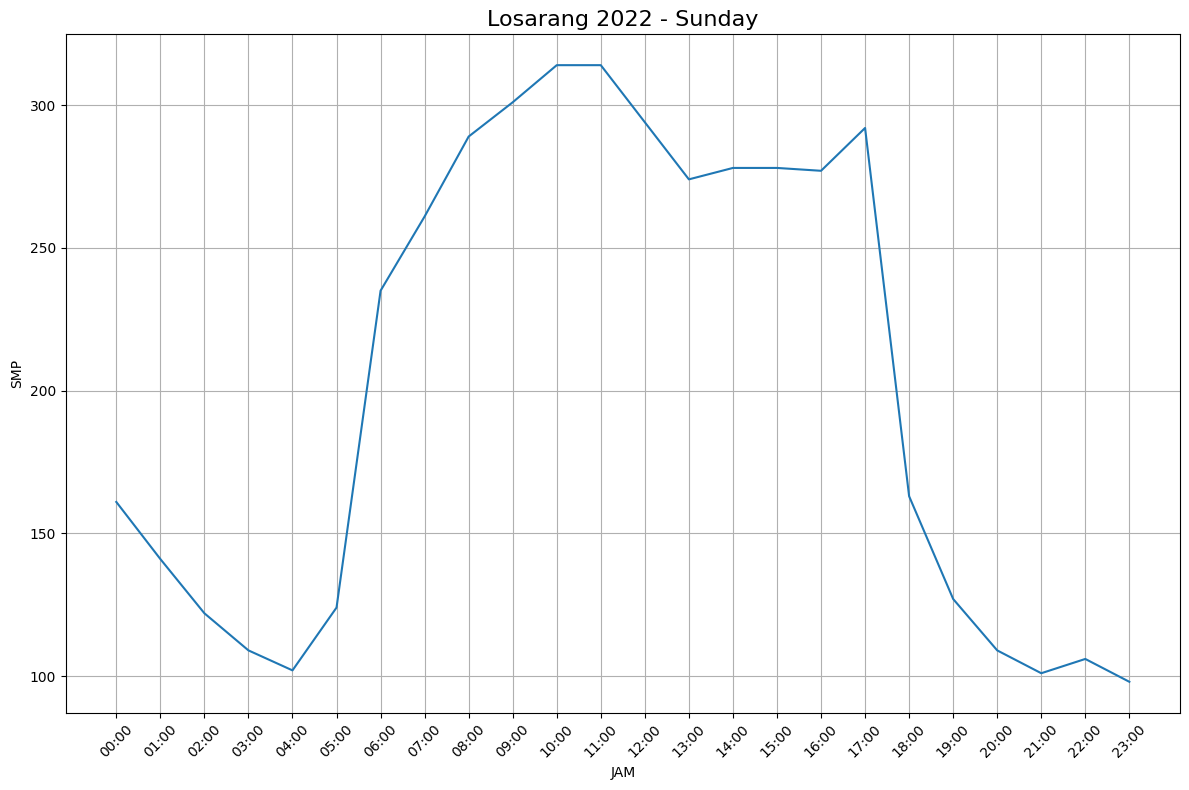

In [8]:
# Urutkan hari secara berurut
urutan_hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['HARI'] = pd.Categorical(df['HARI'], categories=urutan_hari, ordered=True)

# Iterasi melalui hari dan plot setiap hari
for i, hari in enumerate(urutan_hari):
    fig = plt.subplots(figsize=(12, 8))
    data_harian = df[df['HARI'] == hari]  # Filter data per hari
    sns.lineplot(x=data_harian['JAM'], y=data_harian['SMP'])
    plt.title('Losarang 2022 - ' + hari, fontsize=16)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('../Data/Visualisasi/Losarang/2022/4_'+str(i+1)+'_'+hari+'_losarang_2022.png')
    plt.show()

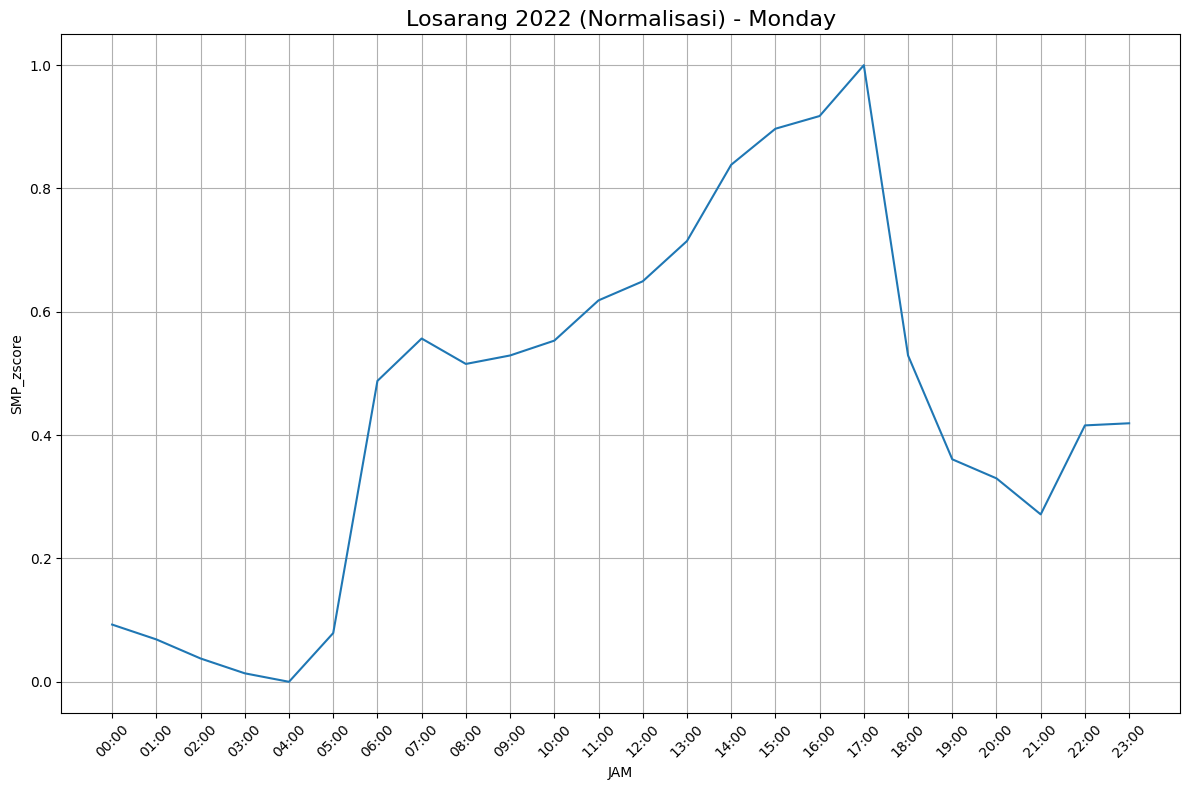

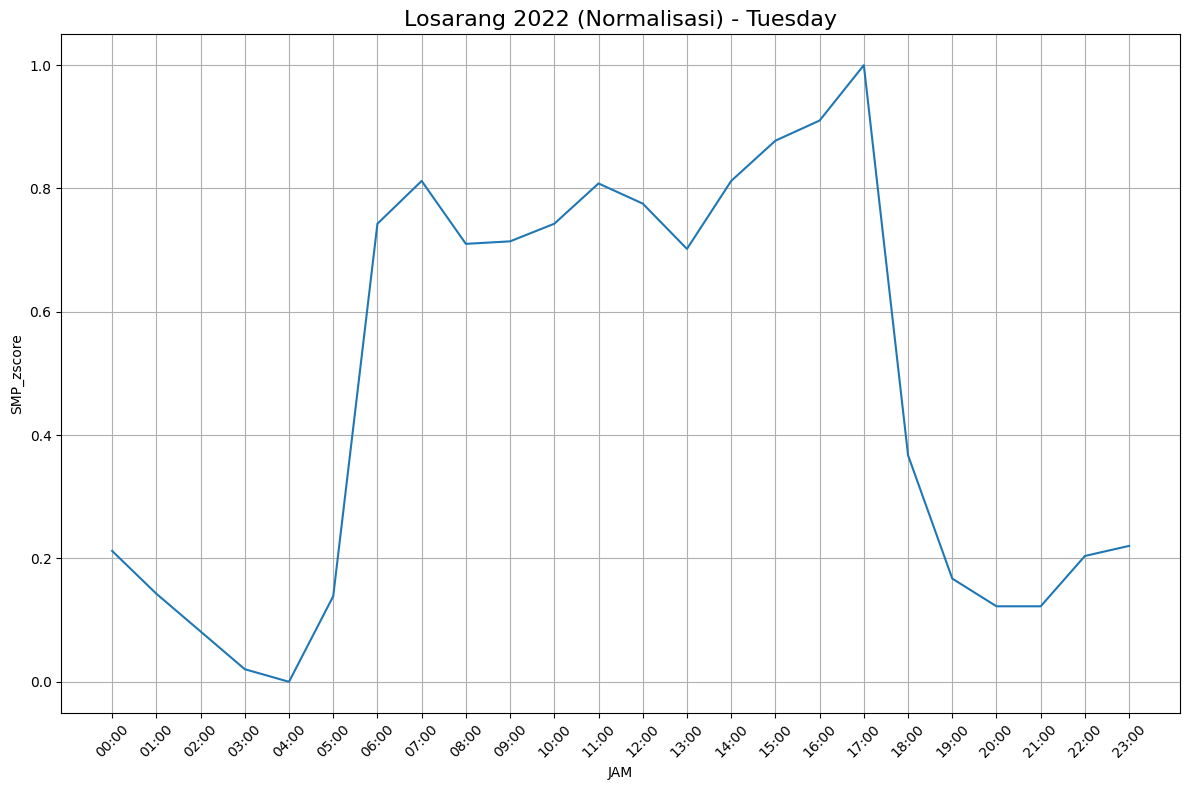

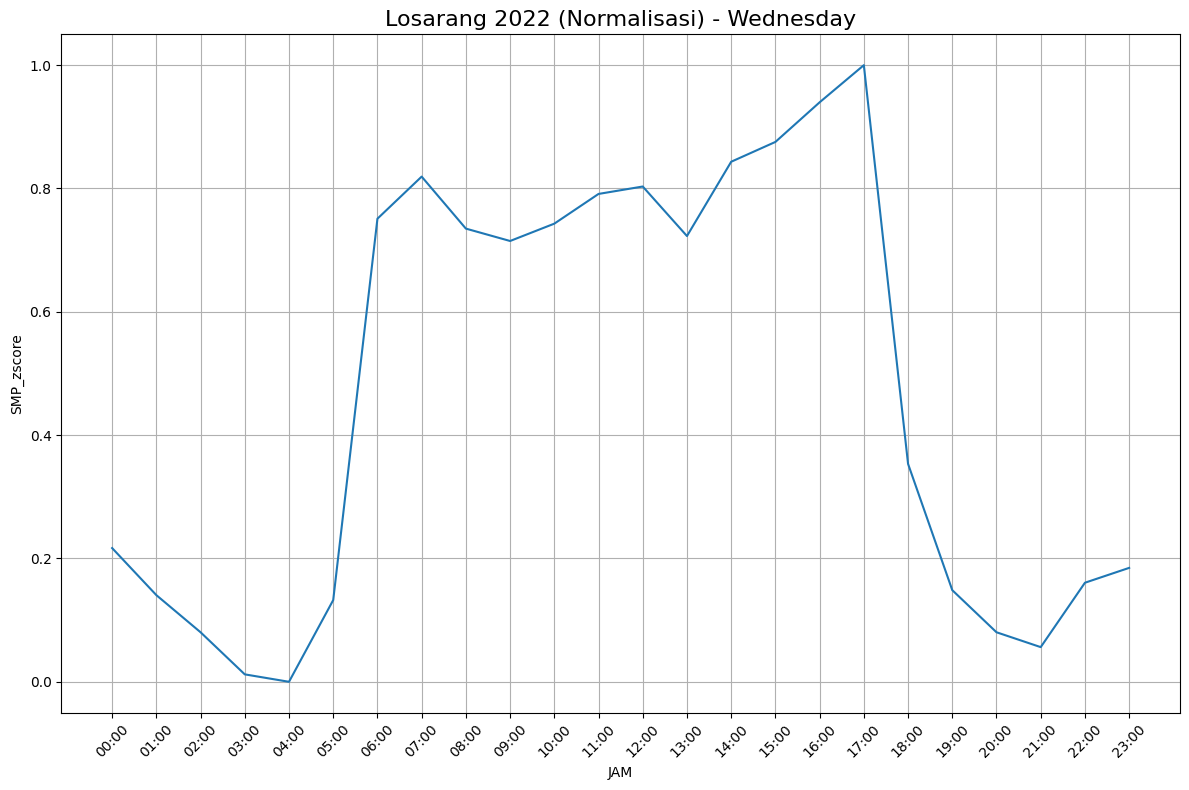

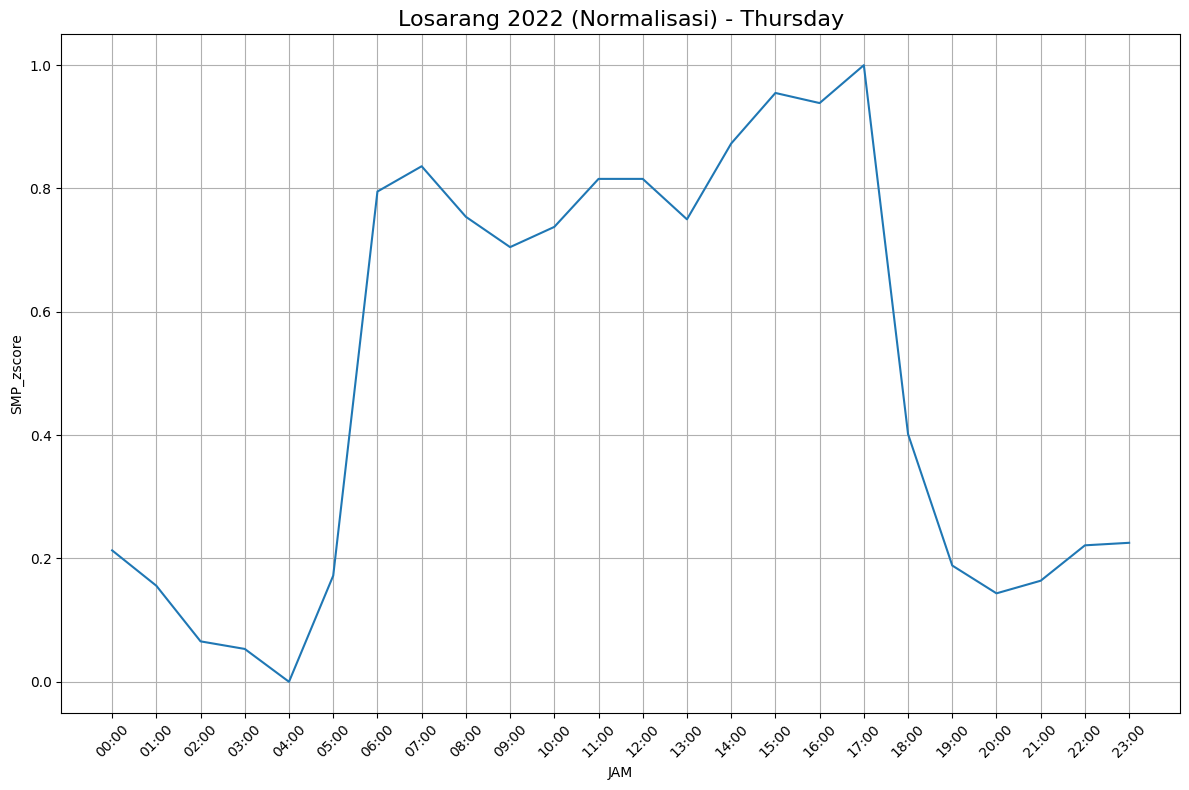

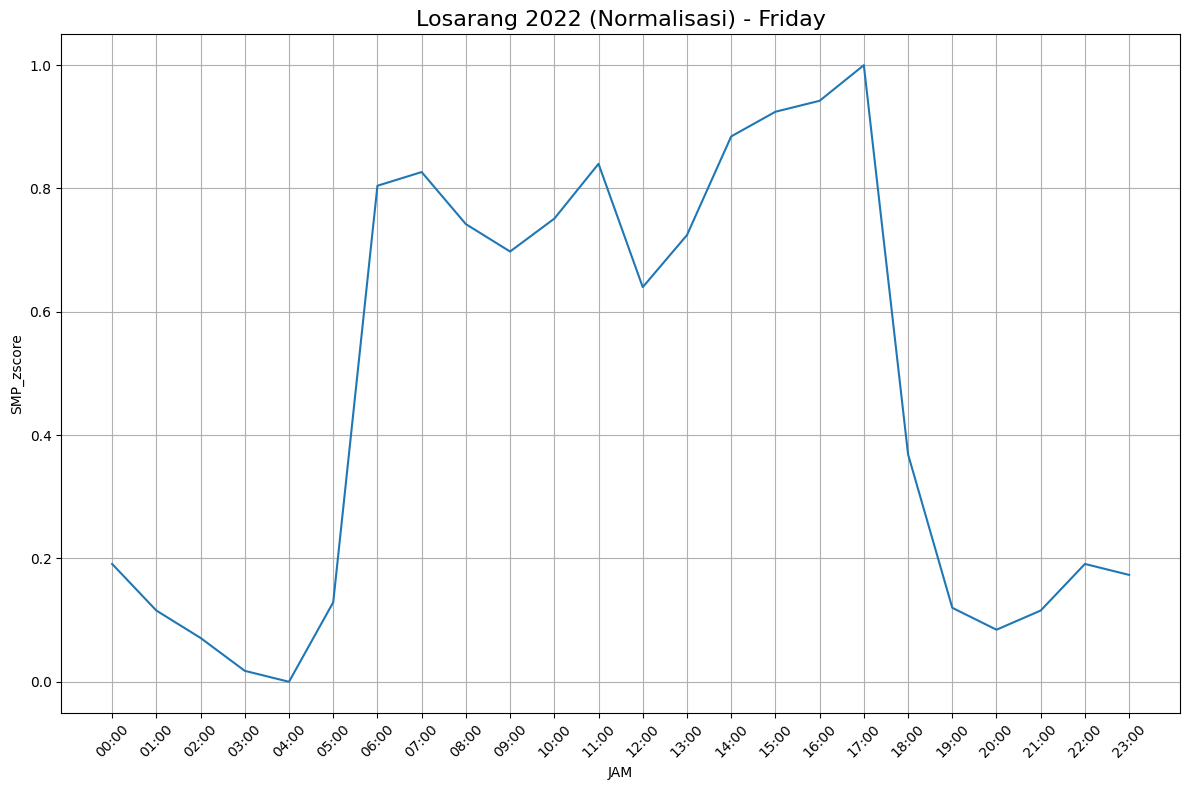

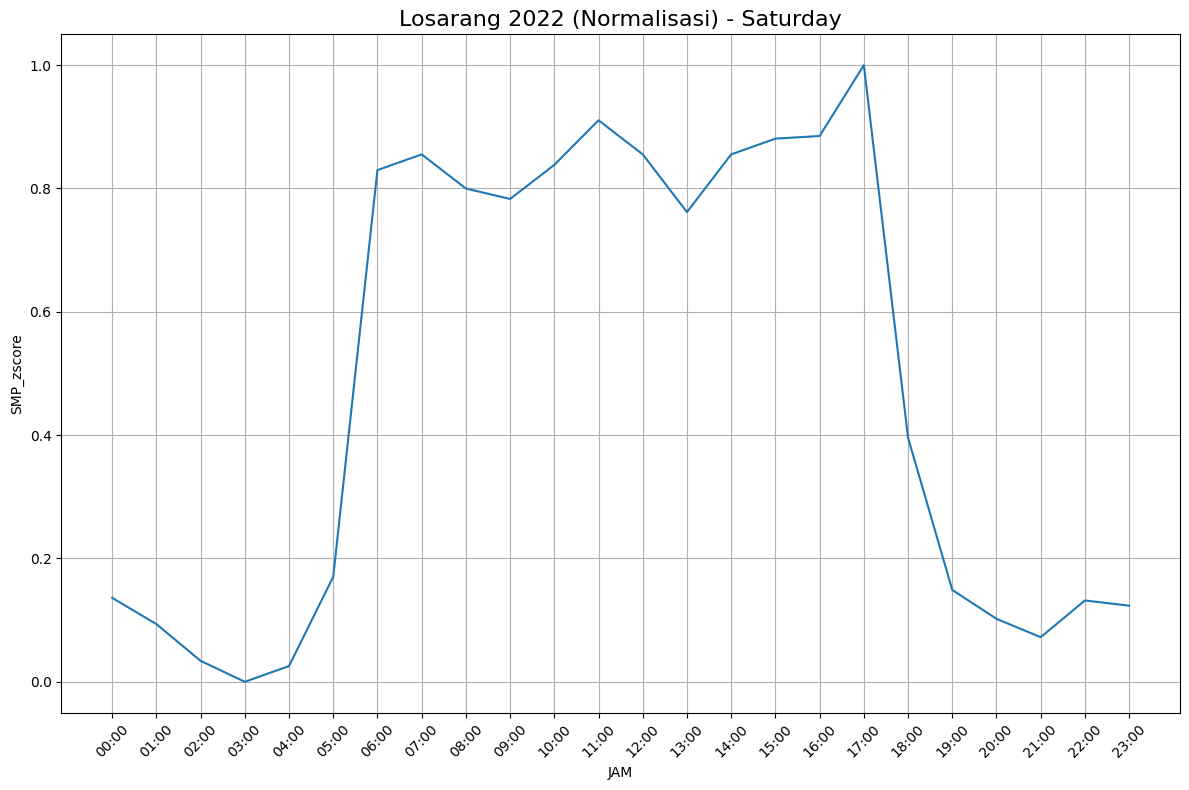

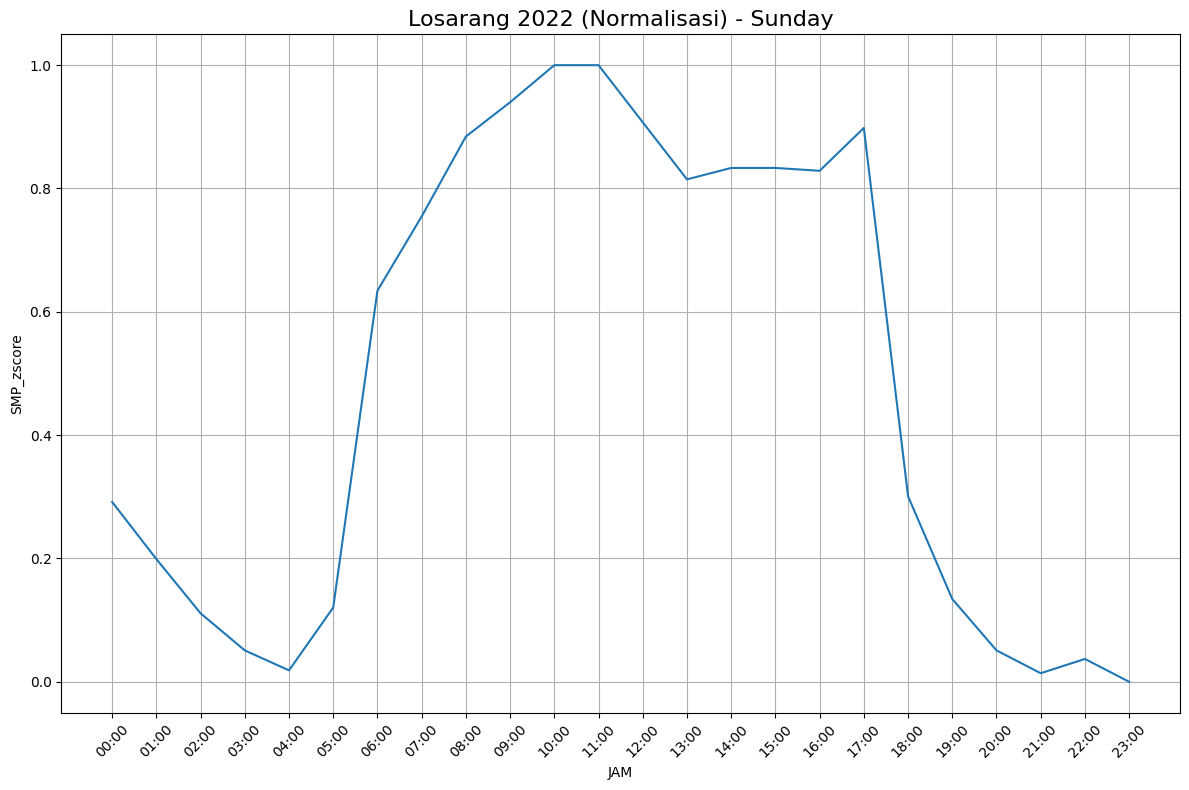

In [9]:
# Urutkan hari secara berurut
urutan_hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['HARI'] = pd.Categorical(df['HARI'], categories=urutan_hari, ordered=True)

# Iterasi melalui hari dan plot setiap hari
for i, hari in enumerate(urutan_hari):
    fig = plt.subplots(figsize=(12, 8))
    data_harian = df[df['HARI'] == hari]  # Filter data per hari
    sns.lineplot(x=data_harian['JAM'], y=data_harian['SMP_zscore'])
    plt.title('Losarang 2022 (Normalisasi) - ' + hari, fontsize=16)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.savefig('../Data/Visualisasi/Losarang/2022/4_'+str(i+1)+'_'+hari+'_normalisasi_losarang_2022.png')
    plt.show()

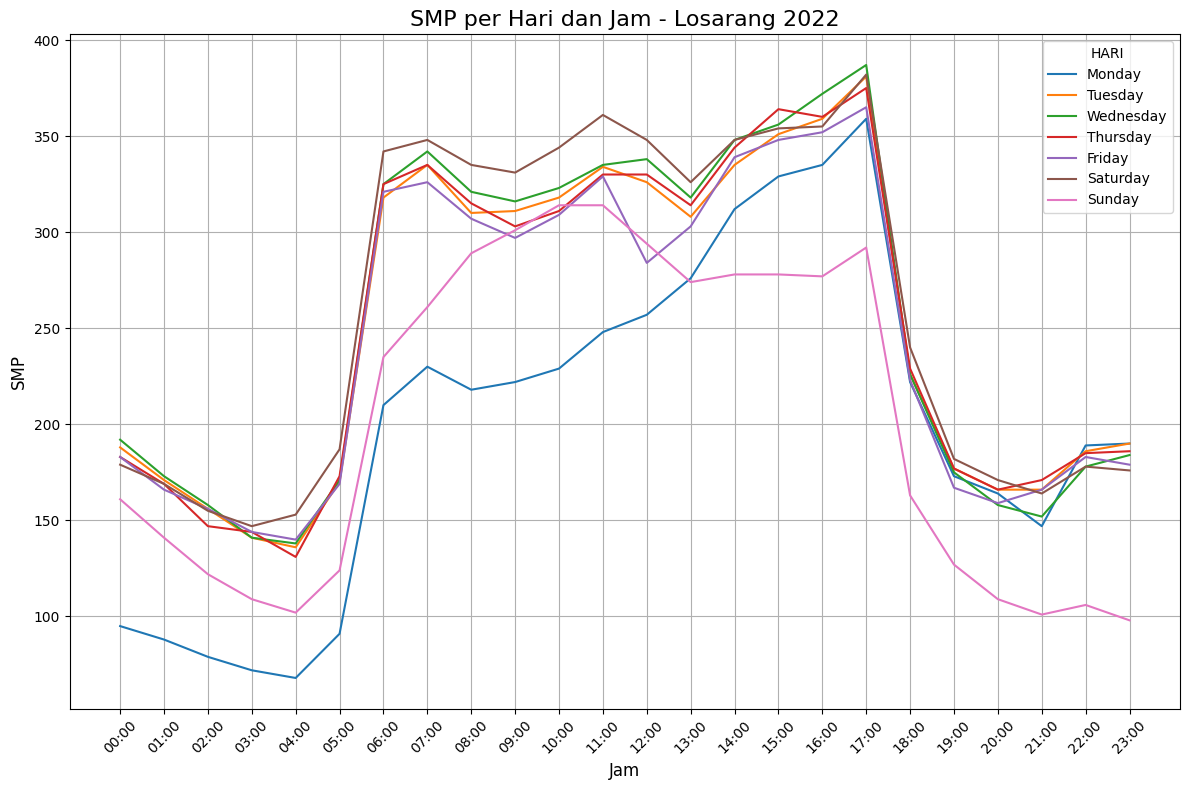

In [10]:
# Ubah 'JAM' menjadi tipe waktu dan 'HARI' menjadi kategori berurut
urutan_hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['HARI'] = pd.Categorical(df['HARI'], categories=urutan_hari, ordered=True)
# df['JAM'] = pd.to_datetime(df['JAM'], format='%H:%M').dt.time

# Membuat visualisasi menggunakan Seaborn lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(x=df['JAM'].astype(str), y=df['SMP'], hue=df['HARI'])

# Menambahkan label dan judul
plt.title('SMP per Hari dan Jam - Losarang 2022', fontsize=16)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('SMP', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Menampilkan visualisasi
plt.tight_layout()
plt.savefig('../Data/Visualisasi/Losarang/2022/4_harian_losarang_2022.png')
plt.show()

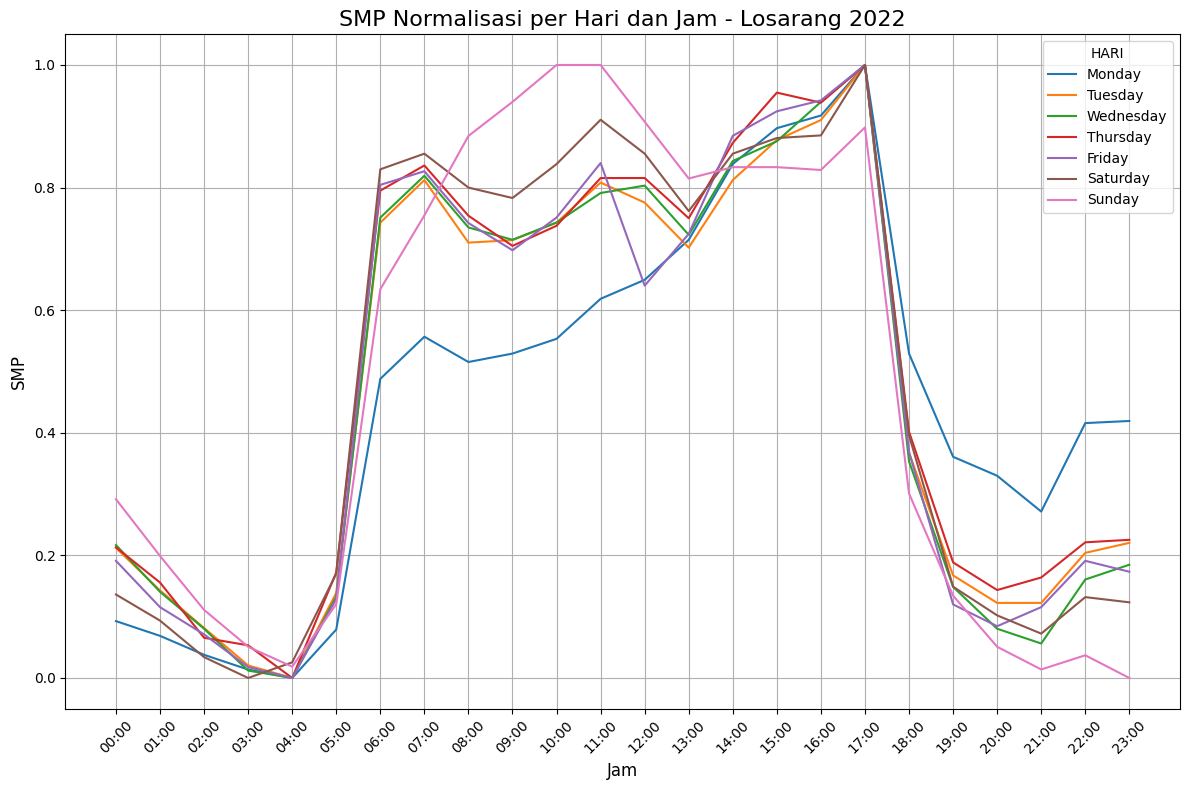

In [11]:
# Ubah 'JAM' menjadi tipe waktu dan 'HARI' menjadi kategori berurut
urutan_hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['HARI'] = pd.Categorical(df['HARI'], categories=urutan_hari, ordered=True)
# df['JAM'] = pd.to_datetime(df['JAM'], format='%H:%M').dt.time

# Membuat visualisasi menggunakan Seaborn lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(x=df['JAM'].astype(str), y=df['SMP_zscore'], hue=df['HARI'])

# Menambahkan label dan judul
plt.title('SMP Normalisasi per Hari dan Jam - Losarang 2022', fontsize=16)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('SMP', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Menampilkan visualisasi
plt.tight_layout()
plt.savefig('../Data/Visualisasi/Losarang/2022/4_harian_normalisasi_losarang_2022.png')
plt.show()